Primeiras 5 linhas:


,cliente_email,produto,quantidade,preco
0,tracybranch@example.net,Impressora,2,89.13
1,hannahford@example.org,Teclado,1,414.27
2,perezandrew@example.org,Monitor,4,562.66
3,sydneywade@example.org,Impressora,3,403.25
4,lramsey@example.net,Teclado,2,401.74



Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cliente_email  200 non-null    object 
 1   produto        200 non-null    object 
 2   quantidade     200 non-null    int64  
 3   preco          200 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.4+ KB
None

Estatísticas descritivas:


,quantidade,preco
count,200.000000,200.000000
mean,3.060000,525.464850
std,1.395038,271.366382
min,1.000000,53.620000
25%,2.000000,303.692500
50%,3.000000,509.285000
75%,4.000000,744.225000
max,5.000000,997.750000


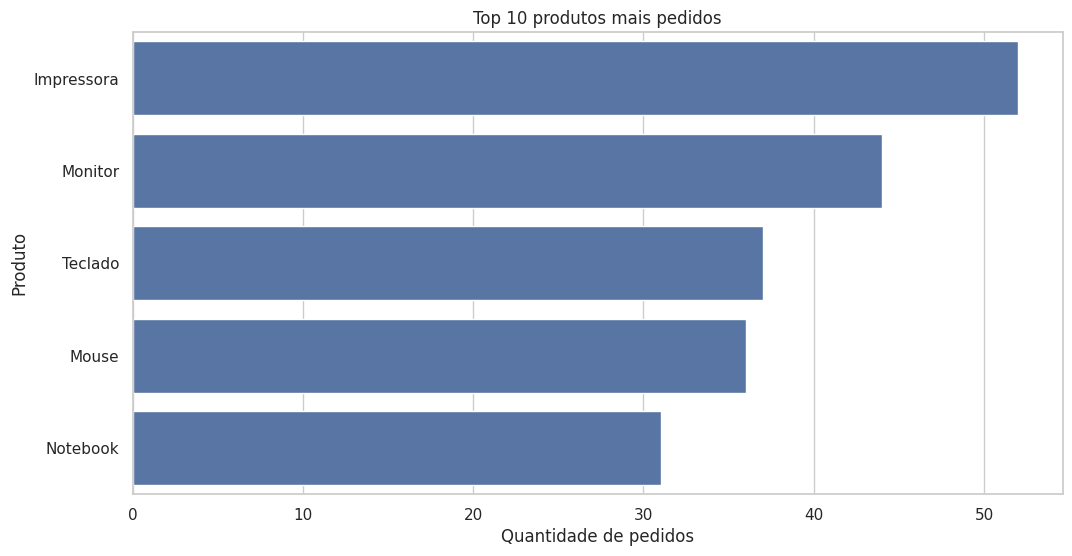

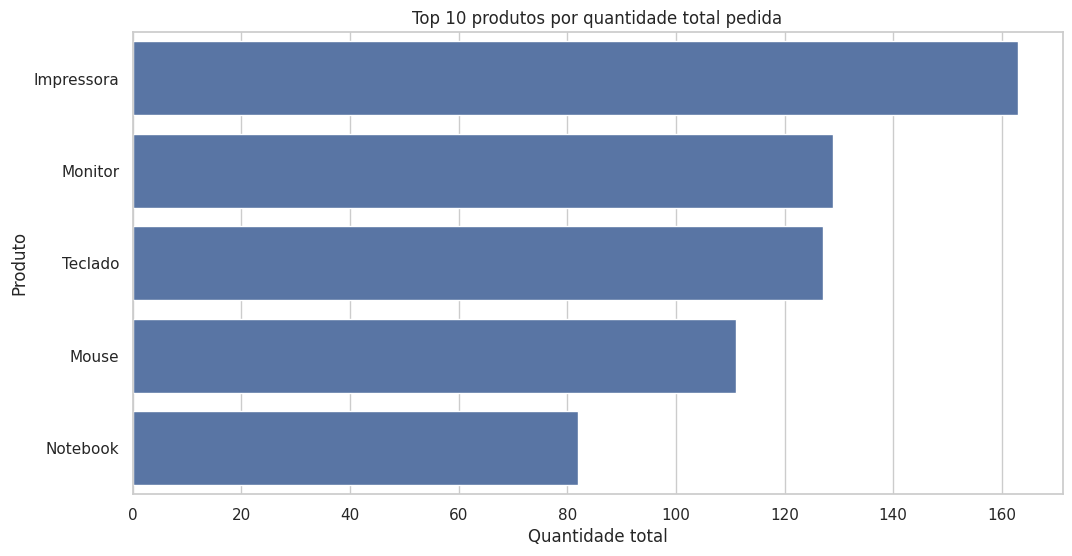

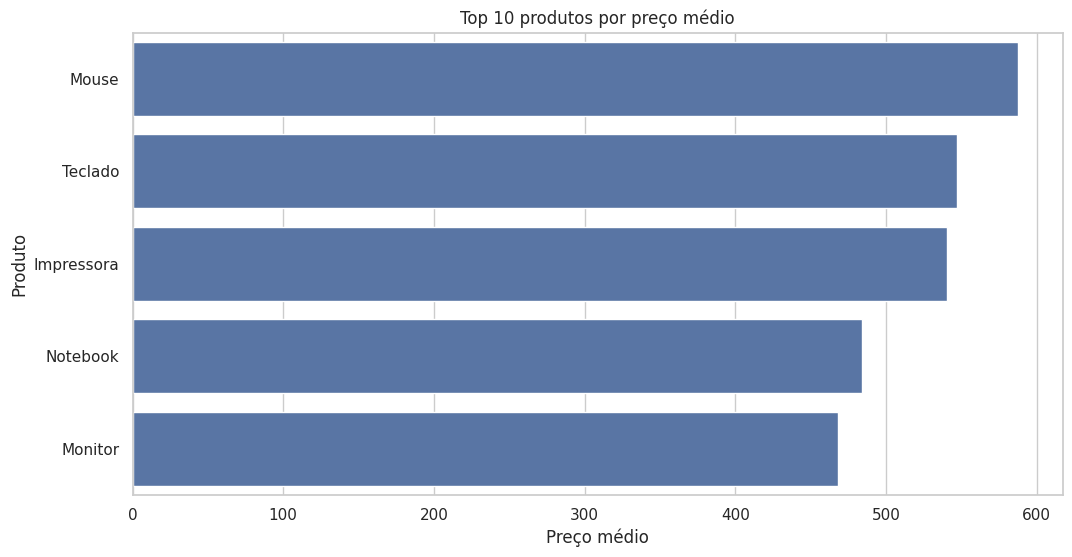


Total de clientes únicos: 80
Média de pedidos por cliente: 2.50

Exemplos aleatórios de pedidos:


,cliente_email,produto,quantidade,preco
9,bfrazier@example.org,Monitor,1,131.16
30,kimberlywhite@example.com,Teclado,5,556.92
177,dduarte@example.org,Monitor,2,125.95
95,senglish@example.org,Monitor,4,434.56
24,andrealarsen@example.net,Mouse,2,918.72


In [1]:
# Explorando dados de pedidos - Notebook inicial

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configurações visuais
sns.set(style="whitegrid")

# Carregar dados transformados
path = Path("../data/processed/pedidos_transformado.csv")
df = pd.read_csv(path)

# Mostrar as primeiras linhas
print("Primeiras 5 linhas:")
display(df.head())

# Informações gerais do DataFrame
print("\nInformações gerais:")
print(df.info())

# Estatísticas básicas para colunas numéricas
print("\nEstatísticas descritivas:")
display(df.describe())

# Contagem dos produtos mais pedidos
plt.figure(figsize=(12, 6))
top_produtos = df['produto'].value_counts().head(10)
sns.barplot(x=top_produtos.values, y=top_produtos.index)
plt.title("Top 10 produtos mais pedidos")
plt.xlabel("Quantidade de pedidos")
plt.ylabel("Produto")
plt.show()

# Quantidade total pedida por produto
if 'quantidade' in df.columns:
    quantidade_por_produto = df.groupby('produto')['quantidade'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=quantidade_por_produto.values, y=quantidade_por_produto.index)
    plt.title("Top 10 produtos por quantidade total pedida")
    plt.xlabel("Quantidade total")
    plt.ylabel("Produto")
    plt.show()

# Preço médio por produto
if 'preco' in df.columns:
    preco_medio = df.groupby('produto')['preco'].mean().sort_values(ascending=False).head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=preco_medio.values, y=preco_medio.index)
    plt.title("Top 10 produtos por preço médio")
    plt.xlabel("Preço médio")
    plt.ylabel("Produto")
    plt.show()

# Total de pedidos únicos por cliente
if 'cliente_email' in df.columns:
    pedidos_por_cliente = df['cliente_email'].value_counts()
    print(f"\nTotal de clientes únicos: {pedidos_por_cliente.count()}")
    print(f"Média de pedidos por cliente: {pedidos_por_cliente.mean():.2f}")

# Mostrar exemplos aleatórios
print("\nExemplos aleatórios de pedidos:")
display(df.sample(5))
